# 无约束极值问题

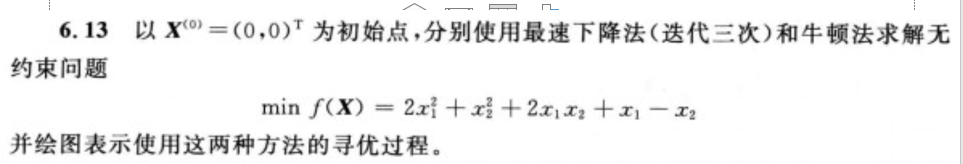

起始条件： $x^{(x)}=(0,0)^T \\$ 
目标函数：
$min f(X)  =  2x_1^2+x_2^2+2x_1x_2+x_1-x_2$

In [2]:
import numpy as np
def func(x):
    return 2*x[0]**2 + x[1]**2 + 2*x[0]*x[1] + x[0] -x[1]

def func_derivative1(x):
    return np.array([4*x[0] + 2*x[1] + 1, 2*x[1] + 2*x[0] - 1]).T

hessian = np.array([[4, 2], [2, 2]])

最速下降法

In [13]:
x = np.array([0, 0]).T

def steepest_decent(x, max_iteration=100, epsilon=1e-5):
    k = 0
    while k < max_iteration:
        dervt = func_derivative1(x)
        d = - dervt
        d_norm = np.sqrt(d.T @ d)
        if d_norm < epsilon:
            break
        k = k + 1
        lambda_ = (dervt.T @ dervt) / (dervt.T @ hessian @ dervt)
        x = x + lambda_ * d
    return x, func(x), k
res, val, k = steepest_decent(x)
print(f'极值点坐标为：({res[0]:.3f},{res[1]:.3f})，函数最小值为：{val:.3f}，迭代轮次为：{k}')

极值点坐标为：(-1.000,1.500)，函数最小值为：-1.250，迭代轮次为：16


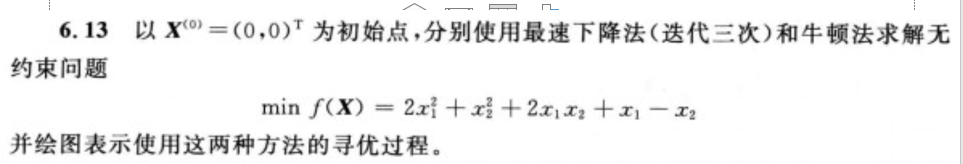

牛顿法

In [12]:
x = np.array([0, 0]).T

def newtons(x, max_iteration=100, epslion=1e-5):
    k = 0
    while k < max_iteration:
        d = -np.linalg.inv(hessian) @ func_derivative1(x)
        if np.sqrt(d.T @ d) < epslion:
            break
        k = k + 1
        x = x + d
    return x, func(x), k
res, val, k = newtons(x)
print(f'极值点坐标为：({res[0]:.3f},{res[1]:.3f})，函数最小值为：{val:.3f}，迭代轮次为：{k}')

极值点坐标为：(-1.000,1.500)，函数最小值为：-1.250，迭代轮次为：1
